### **Imports**

In [0]:
from numpy.random import seed
seed(888)


import tensorflow
tensorflow.random.set_seed(404)

In [0]:
import os
import numpy as np
import tensorflow as tf
import datetime

import itertools

import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime

from sklearn.metrics import confusion_matrix

from IPython.display import display
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
%matplotlib inline

## **Constants**

In [0]:
# names from website
LOD_DIR = 'tensorboard_cifar_logs'
LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXEL = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUT = IMAGE_PIXEL* COLOR_CHANNELS
VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000


## **Get Data**

In [0]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
type(cifar10)

module

Explore Data

In [0]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

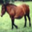

In [0]:
pic = array_to_img(x_train_all[7])
display(pic)

In [0]:
y_train_all.shape

(50000, 1)

In [0]:
y_train_all[7][0]

7

In [0]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

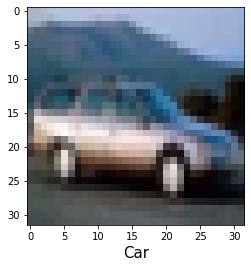

In [0]:
plt.imshow(x_train_all[4])
# Adding label names
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.show()

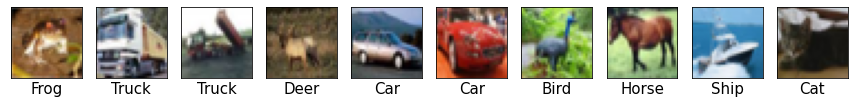

In [0]:
plt.figure(figsize=[15,5])
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(x_train_all[i])
  plt.yticks([])
  plt.xticks([])
  # Adding label names
  plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=15)

In [0]:
numof_images, x, y, c  = x_train_all.shape

In [0]:
print(f'images = {numof_images} \t| width = {x} \t|height={y} \t|chanel = {c}')

images = 50000 	| width = 32 	|height=32 	|chanel = 3


In [0]:
x_test.shape

(10000, 32, 32, 3)

# Preprocessing Data

In [0]:
# stored value of pixel is
x_train_all[0][0][0] # its 8bit unsigned int

array([59, 62, 63], dtype=uint8)

In [0]:
x_train_all, x_test = x_train_all/ 255.0, x_test / 255.0 # 255 is the largest value of RGB combination

In [0]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUT)
x_train_all.shape

(50000, 3072)

In [0]:
x_test.shape
x_test = x_test.reshape(x_test.shape[0], TOTAL_INPUT)
x_test.shape

(10000, 3072)

In [0]:
# validation set
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [0]:
# trainning set
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape


(40000, 3072)

### **Create a small dataset(for illutration)**




In [0]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

## **Define Neural Network using keras**
---






In [0]:
model_1 = Sequential([
                      Dense(units=128, input_dim=TOTAL_INPUT, activation='relu', name='m1_hidden1'),# input layer
                      Dense(units=64, activation='relu', name='m1_hidden2'), # input layer
                      Dense(16, activation='relu', name='m1_hidden3'),  # input layer
                      Dense(10, activation='softmax', name='m1_output') # output layer
])

In [0]:
# regulization 
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUT, ))) # dropout technique
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

In [0]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUT, ))) # dropout technique
model_3.add(Dense(128, activation='relu', name='m3_hidden_1'))
model_3.add(Dropout(0.2, seed=42))
model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(16, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

In [0]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

## **Complie Model**

In [0]:
model_2.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
model_3.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
model_1.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
)

In [0]:
# layer description
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 3072)              0         
_________________________________________________________________
m2_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m2_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m2_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m2_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [0]:
first_lyaer = 32*32*3*128 + 128 # 128 bias
second_lyaer = 128*64 + 64 # 64 bias
third_layer = 64*16 + 16 # 16 bias
output_layer = 16*10+10 # 10 bias
print(f'first layer {first_lyaer}\t second layer {second_lyaer}\t third layer {third_layer}\t putput layer {output_layer}\t total {first_lyaer+second_lyaer+third_layer+output_layer}')


first layer 393344	 second layer 8256	 third layer 1040	 putput layer 170	 total 402810


## **Tensorboard (visualizing learning)**

In [0]:
def get_tensorboard(model_name):
  folder_name = f'{model_name} at {datetime.now().strftime("%Y-%d-%m %H:%M")}'
  LOG_PATH = '/content/drive/My Drive/Machine Learning Neural Network/Image Processing'
  dir_path = os.path.join(LOG_PATH, folder_name)
  try:
    os.makedirs(dir_path)
  except OSError as err:
    print(err.strerror)
  else:
    print('Sucessfully created Folder')
  return TensorBoard(log_dir=dir_path)



## **Fit Model**

In [0]:
sample_per_batch = 1000

In [0]:
%%time
# epochs using trainingmodel. for random accuracy
nr_epochs = 150
model_1.fit(x_train_xs, y_train_xs, batch_size=sample_per_batch, epochs=nr_epochs,
            callbacks=get_tensorboard(model_name='model 1'), validation_schema=(x_val, y_val))

Sucessfully created Folder
Epoch 1/150
1/1 [==============================] - 0s 8ms/step - loss: 2.4108 - accuracy: 0.0960
Epoch 2/150
1/1 [==============================] - 0s 6ms/step - loss: 2.5816 - accuracy: 0.1210
Epoch 3/150
1/1 [==============================] - 0s 5ms/step - loss: 2.5618 - accuracy: 0.1130
Epoch 4/150
1/1 [==============================] - 0s 5ms/step - loss: 2.3329 - accuracy: 0.0950
Epoch 5/150
1/1 [==============================] - 0s 4ms/step - loss: 2.3703 - accuracy: 0.1170
Epoch 6/150
1/1 [==============================] - 0s 4ms/step - loss: 2.3183 - accuracy: 0.0980
Epoch 7/150
1/1 [==============================] - 0s 5ms/step - loss: 2.3013 - accuracy: 0.1460
Epoch 8/150
1/1 [==============================] - 0s 3ms/step - loss: 2.2914 - accuracy: 0.1620
Epoch 9/150
1/1 [==============================] - 0s 4ms/step - loss: 2.2743 - accuracy: 0.1460
Epoch 10/150
1/1 [==============================] - 0s 4ms/step - loss: 2.2739 - accuracy: 0.1420
Ep

In [0]:
%%time
# epochs using trainingmodel. for random accuracy
nr_epochs = 150
model_2.fit(x_train_xs, y_train_xs, batch_size=sample_per_batch, epochs=nr_epochs,
            callbacks=get_tensorboard(model_name='model 2'), validation_schema=(x_val, y_val))

Sucessfully created Folder
Epoch 1/150
1/1 [==============================] - 0s 5ms/step - loss: 2.4587 - accuracy: 0.1030
Epoch 2/150
1/1 [==============================] - 0s 6ms/step - loss: 2.4472 - accuracy: 0.1260
Epoch 3/150
1/1 [==============================] - 0s 4ms/step - loss: 2.4557 - accuracy: 0.1030
Epoch 4/150
1/1 [==============================] - 0s 4ms/step - loss: 2.3160 - accuracy: 0.1010
Epoch 5/150
1/1 [==============================] - 0s 4ms/step - loss: 2.2957 - accuracy: 0.1240
Epoch 6/150
1/1 [==============================] - 0s 5ms/step - loss: 2.2884 - accuracy: 0.1280
Epoch 7/150
1/1 [==============================] - 0s 3ms/step - loss: 2.2854 - accuracy: 0.1060
Epoch 8/150
1/1 [==============================] - 0s 5ms/step - loss: 2.2707 - accuracy: 0.1300
Epoch 9/150
1/1 [==============================] - 0s 4ms/step - loss: 2.2760 - accuracy: 0.1250
Epoch 10/150
1/1 [==============================] - 0s 5ms/step - loss: 2.2660 - accuracy: 0.1300
Ep

# Training Full Data

In [0]:
%%time
# epochs using trainingmodel. for random accuracy
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=sample_per_batch, epochs=nr_epochs,
            callbacks=get_tensorboard(model_name='model 1 XL'), validation_schema=(x_val, y_val))

Sucessfully created Folder
Epoch 1/100
40/40 [==============================] - 0s 11ms/step - loss: 1.9170 - accuracy: 0.3273
Epoch 2/100
40/40 [==============================] - 0s 10ms/step - loss: 1.8010 - accuracy: 0.3616
Epoch 3/100
40/40 [==============================] - 0s 10ms/step - loss: 1.7518 - accuracy: 0.3791
Epoch 4/100
40/40 [==============================] - 0s 10ms/step - loss: 1.7110 - accuracy: 0.3937
Epoch 5/100
40/40 [==============================] - 0s 10ms/step - loss: 1.6972 - accuracy: 0.3990
Epoch 6/100
40/40 [==============================] - 0s 10ms/step - loss: 1.6685 - accuracy: 0.4063
Epoch 7/100
40/40 [==============================] - 0s 10ms/step - loss: 1.6558 - accuracy: 0.4094
Epoch 8/100
40/40 [==============================] - 0s 10ms/step - loss: 1.6303 - accuracy: 0.4202
Epoch 9/100
40/40 [==============================] - 0s 10ms/step - loss: 1.6162 - accuracy: 0.4248
Epoch 10/100
40/40 [==============================] - 0s 10ms/step - loss

In [0]:
%%time
# epochs using trainingmodel. for random accuracy
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=sample_per_batch, epochs=nr_epochs,
            callbacks=get_tensorboard(model_name='model 2 XL'), validation_schema=(x_val, y_val))

Sucessfully created Folder
Epoch 1/100
40/40 [==============================] - 0s 12ms/step - loss: 2.1083 - accuracy: 0.2433
Epoch 2/100
40/40 [==============================] - 0s 10ms/step - loss: 1.9992 - accuracy: 0.2799
Epoch 3/100
40/40 [==============================] - 0s 11ms/step - loss: 1.9239 - accuracy: 0.3024
Epoch 4/100
40/40 [==============================] - 0s 10ms/step - loss: 1.8664 - accuracy: 0.3252
Epoch 5/100
40/40 [==============================] - 0s 10ms/step - loss: 1.8226 - accuracy: 0.3439
Epoch 6/100
40/40 [==============================] - 0s 10ms/step - loss: 1.7883 - accuracy: 0.3574
Epoch 7/100
40/40 [==============================] - 0s 10ms/step - loss: 1.7563 - accuracy: 0.3711
Epoch 8/100
40/40 [==============================] - 0s 10ms/step - loss: 1.7326 - accuracy: 0.3857
Epoch 9/100
40/40 [==============================] - 0s 10ms/step - loss: 1.7042 - accuracy: 0.3952
Epoch 10/100
40/40 [==============================] - 0s 10ms/step - loss

In [0]:
%%time
# epochs using trainingmodel. for random accuracy
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=sample_per_batch, epochs=nr_epochs,
            callbacks=get_tensorboard(model_name='model 3 XL'), validation_schema=(x_val, y_val))

Sucessfully created Folder
Epoch 1/100
40/40 [==============================] - 0s 11ms/step - loss: 2.2582 - accuracy: 0.1437
Epoch 2/100
40/40 [==============================] - 0s 10ms/step - loss: 2.0979 - accuracy: 0.2256
Epoch 3/100
40/40 [==============================] - 0s 10ms/step - loss: 1.9863 - accuracy: 0.2720
Epoch 4/100
40/40 [==============================] - 0s 10ms/step - loss: 1.9123 - accuracy: 0.3064
Epoch 5/100
40/40 [==============================] - 0s 11ms/step - loss: 1.8638 - accuracy: 0.3257
Epoch 6/100
40/40 [==============================] - 0s 10ms/step - loss: 1.8182 - accuracy: 0.3449
Epoch 7/100
40/40 [==============================] - 0s 11ms/step - loss: 1.7850 - accuracy: 0.3558
Epoch 8/100
40/40 [==============================] - 0s 11ms/step - loss: 1.7664 - accuracy: 0.3611
Epoch 9/100
40/40 [==============================] - 0s 11ms/step - loss: 1.7511 - accuracy: 0.3684
Epoch 10/100
40/40 [==============================] - 0s 11ms/step - loss

## Prediction on individual image

In [0]:
x_val.shape

(10000, 3072)

In [0]:
x_val[0]

array([0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
       0.28235294])

In [0]:
test = np.expand_dims(x_val[0], axis=0)

In [0]:
test.shape

(1, 3072)

In [0]:
model_2.predict(test).sum()

1.0

In [0]:
model_2.predict(x_val)

array([[4.9484801e-02, 6.6169892e-03, 7.7269316e-02, ..., 2.4645193e-02,
        8.5357355e-04, 1.0502849e-03],
       [3.2684112e-03, 8.2191837e-01, 1.7459618e-04, ..., 1.0926381e-03,
        8.2019143e-02, 8.8514209e-02],
       [3.1475984e-02, 2.8037492e-02, 5.1491220e-02, ..., 9.3588978e-02,
        2.8348092e-02, 6.6115505e-01],
       ...,
       [1.3062040e-03, 3.4389812e-01, 1.0235923e-03, ..., 7.0402808e-03,
        3.4642649e-01, 2.8968364e-01],
       [1.5134444e-03, 7.7306187e-01, 2.7848508e-02, ..., 1.0030219e-02,
        8.9361416e-03, 7.7094883e-02],
       [2.4958544e-03, 2.4163302e-05, 4.8906177e-02, ..., 6.1325073e-01,
        4.0713116e-05, 1.4205489e-04]], dtype=float32)

In [0]:
model_2.predict(x_val).shape

(10000, 10)

In [0]:
model_2.predict_classes(test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([6])

In [0]:
y_val

array([[6],
       [9],
       [9],
       ...,
       [1],
       [1],
       [5]], dtype=uint8)

In [0]:
print(y_val)

[[6]
 [9]
 [9]
 ...
 [1]
 [1]
 [5]]


In [0]:
for i in range(10):
  test_img = np.expand_dims(x_val[i], axis=0)
  predict_val = model_2.predict_classes(test_img)[0]
  print(f'actual value {y_val[i][0]} vs predict value {predict_val}')


actual value 6 vs predict value 6
actual value 9 vs predict value 1
actual value 9 vs predict value 9
actual value 4 vs predict value 6
actual value 1 vs predict value 8
actual value 1 vs predict value 9
actual value 2 vs predict value 2
actual value 7 vs predict value 7
actual value 8 vs predict value 8
actual value 3 vs predict value 2


# Evaluation

In [0]:
model_2.metrics_names

['loss', 'accuracy']

In [0]:
test_loss, test_Accuracy = model_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4338 - accuracy: 0.4877


# confusion metrics

In [0]:
predictions = model_2.predict_classes(x_test)
conf_metrics = confusion_matrix(y_true=y_test, y_pred=predictions)

In [0]:
conf_metrics

array([[560,  21,  95,  21,  44,  22,  27,  28, 165,  17],
       [ 58, 585,  31,  23,  16,  26,  26,  29, 119,  87],
       [ 71,  13, 372,  74, 201,  84, 110,  44,  23,   8],
       [ 32,  13, 109, 306,  85, 201, 142,  53,  36,  23],
       [ 47,  10, 154,  48, 489,  39, 115,  61,  33,   4],
       [ 12,  10, 124, 189,  82, 392,  81,  63,  38,   9],
       [  8,  13,  82,  73, 133,  67, 583,  19,  17,   5],
       [ 60,   8,  64,  56, 118,  99,  33, 522,  20,  20],
       [116,  51,  21,  21,  18,  25,  18,  19, 691,  20],
       [ 75, 203,  26,  54,  21,  26,  33,  53, 132, 377]])

In [0]:
conf_metrics.shape
nr_cols = conf_metrics.shape[0]
nr_rows = conf_metrics.shape[1]

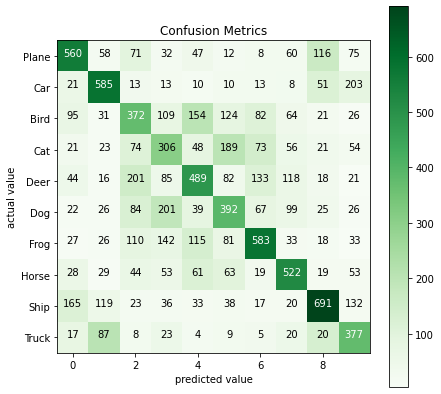

In [0]:
plt.figure(figsize=(7,7))
plt.imshow(conf_metrics, cmap=plt.cm.Greens)
plt.title("Confusion Metrics")
plt.ylabel('actual value')
plt.xlabel('predicted value')
tick_mark = np.arange(10)
plt.yticks(tick_mark, LABEL_NAMES)
plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
  plt.text(i, j, conf_metrics[i, j], horizontalalignment='center',
           color='white' if conf_metrics[i,j]>conf_metrics.max()/2 else 'black')
plt.show()

In [0]:
# true positive
np.diag(conf_metrics)


array([560, 585, 372, 306, 489, 392, 583, 522, 691, 377])

In [0]:
recal = np.diag(conf_metrics)/np.sum(conf_metrics, axis=1)
recal

array([0.56 , 0.585, 0.372, 0.306, 0.489, 0.392, 0.583, 0.522, 0.691,
       0.377])

In [0]:
precision = np.diag(conf_metrics)/np.sum(conf_metrics, axis=0)
precision

array([0.53897979, 0.63106796, 0.34508349, 0.35375723, 0.4051367 ,
       0.39959225, 0.49914384, 0.58585859, 0.54238619, 0.66140351])

In [0]:
avg_recall = np.mean(recal)
avg_preci = np.mean(precision)
print(f'model 2 recall score is {avg_recall}')
print(f'model 2 precision score is {avg_preci}')

f1_score = 2 * (avg_preci * avg_recall) / (avg_preci + avg_recall) 
print(f'f  score is {f1_score}')


model 2 recall score is 0.48769999999999997
model 2 precision score is 0.49624095336590407
f  score is 0.49193340744411757
